In [1]:
# this file takes in all files and produce the appropriate d2s analysis
from pathlib import Path
from datasets import load_dataset
from evaluate import load
import pandas as pd
import numpy as np
from pathlib import Path
from functional import seq
from funcutils import underscore as _
from funcutils import get
from IPython.display import display, display_html, HTML
from editdistance import distance as edit_distance

import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)

In [3]:
dspl_html = lambda x: display_html(x, raw=True)
rouge = load('rouge')

In [4]:
root_path = Path("/home/vente/repos/nlgs-research")

pkl = list((root_path / "pipeline/predictions").glob("*mt*"))[1]
pkl

PosixPath('/home/vente/repos/nlgs-research/pipeline/predictions/mt-t5-base-5.pkl')

In [5]:
OUTPUT_PATH = root_path / "pipeline/scores" / pkl.name.removesuffix(".pkl")
OUTPUT_PATH.mkdir(exist_ok=True)
OUTPUT_PATH

PosixPath('/home/vente/repos/nlgs-research/pipeline/scores/mt-t5-base-5')

 ## First, Data to sentence.

In [6]:
preds_raw = pd.read_pickle(pkl)
test_predictions = preds_raw[preds_raw.task == 'd2s']
test_predictions 

,record_idx,seed_number,subset,category,split_index,sd,nl,task,input_ids,attention_mask,labels,pred_ids,decoded
77337,14495,0,test,Airport,0,"d2s 0: Abilene, Texas is served by the Abilene...","Abilene Regional Airport|city served|Abilene, ...",d2s,"[891, 23, 14205, 7676, 5735, 9175, 6726, 2098,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 26, 357, 7, 3, 632, 10, 891, 23, 14205, 6,...","[0, 3, 26, 357, 7, 3, 632, 10, 891, 23, 14205,...",d2s 0: Abilene Regional Airport serves the cit...
77339,14495,1,test,Airport,0,d2s 1: Abilene Regional Airport serves the cit...,"Abilene Regional Airport|city served|Abilene, ...",d2s,"[891, 23, 14205, 7676, 5735, 9175, 6726, 2098,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 26, 357, 7, 209, 10, 891, 23, 14205, 7676,...","[0, 3, 26, 357, 7, 3, 632, 10, 891, 23, 14205,...",d2s 0: Abilene Regional Airport serves the cit...
77341,14496,0,test,Airport,1,d2s 0: Adolfo Suarez Madrid-Barajas Airport ca...,Adolfo Suarez Madrid-Barajas Airport|location|...,d2s,"[1980, 32, 40, 89, 32, 1923, 9, 2638, 12033, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 26, 357, 7, 3, 632, 10, 1980, 32, 40, 89, ...","[0, 3, 26, 357, 7, 3, 632, 10, 1980, 32, 40, 8...",d2s 0: Adolfo Suarez Madrid-Barajas Airport is...
77343,14496,1,test,Airport,1,d2s 1: Adolfo Suarez Madrid-Barajas airport is...,Adolfo Suarez Madrid-Barajas Airport|location|...,d2s,"[1980, 32, 40, 89, 32, 1923, 9, 2638, 12033, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 26, 357, 7, 209, 10, 1980, 32, 40, 89, 32,...","[0, 3, 26, 357, 7, 3, 632, 10, 1980, 32, 40, 8...",d2s 0: Adolfo Suarez Madrid-Barajas Airport is...
77345,14496,2,test,Airport,1,d2s 2: Adolfo Suarez Madrid-Barajas Airport is...,Adolfo Suarez Madrid-Barajas Airport|location|...,d2s,"[1980, 32, 40, 89, 32, 1923, 9, 2638, 12033, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 26, 357, 7, 204, 10, 1980, 32, 40, 89, 32,...","[0, 3, 26, 357, 7, 3, 632, 10, 1980, 32, 40, 8...",d2s 0: Adolfo Suarez Madrid-Barajas Airport is...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85775,16092,1,test,University,1597,"d2s 1: Established in 1928, the School of Busi...",School of Business and Social Sciences at the ...,d2s,"[1121, 13, 1769, 11, 2730, 9226, 44, 8, 71, 29...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 26, 357, 7, 209, 10, 25275, 16, 29004, 6, ...","[0, 3, 26, 357, 7, 209, 10, 37, 1121, 13, 1769...",d2s 1: The School of Business and Social Scien...
85777,16093,0,test,University,1598,d2s 0: Denmark is led by the Monarchy of Demar...,School of Business and Social Sciences at the ...,d2s,"[1121, 13, 1769, 11, 2730, 9226, 44, 8, 71, 29...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 26, 357, 7, 3, 632, 10, 18001, 19, 2237, 5...","[0, 3, 26, 357, 7, 209, 10, 37, 1121, 13, 1769...",d2s 1: The School of Business and Social Scien...
85779,16093,1,test,University,1598,d2s 1: The School of Business and Social Scien...,School of Business and Social Sciences at the ...,d2s,"[1121, 13, 1769, 11, 2730, 9226, 44, 8, 71, 29...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 26, 357, 7, 209, 10, 37, 1121, 13, 1769, 1...","[0, 3, 26, 357, 7, 209, 10, 37, 1121, 13, 1769...",d2s 1: The School of Business and Social Scien...
85781,16093,2,test,University,1598,d2s 2: The School of Business and Social Scien...,School of Business and Social Sciences at the ...,d2s,"[1121, 13, 1769, 11, 2730, 9226, 44, 8, 71, 29...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 26, 357, 7, 204, 10, 37, 1121, 13, 1769, 1...","[0, 3, 26, 357, 7, 209, 10, 37, 1121, 13, 1769...",d2s 1: The School of Business and Social Scien...


In [7]:
compute_rouge = lambda x,y: rouge.compute(references=[x], predictions=[y], use_stemmer=False, use_aggregator=False)
compute_rouge(["general kenobi"], "general kenobi")
y_pred = test_predictions.drop(columns=['input_ids','attention_mask','pred_ids','labels'])

In [8]:
chunked = (
  seq(y_pred.to_dict('records'))
    .group_by(get.record_idx)
    .map(get[1]) # focus on the values
    .map(lambda x: [
      seq(x).map(get.sd).map(get[7:]).to_list(),        # gather up all of the references
      seq(x).map(get.decoded).to_list()[0][7:] # and the first prediction
    ])
)
chunked

"['Abilene, Texas is served by the Abilene regional airport.', 'Abilene Regional Airport serves the city of Abilene in Texas.']","Abilene Regional Airport serves the city of Abilene, Texas."
"['Adolfo Suarez Madrid-Barajas Airport can be found in Madrid, Paracuellos de Jarama, San Sebastian de los Reyes and Alcobendas.', 'Adolfo Suarez Madrid-Barajas airport is located at Madrid, Paracuellos de Jarama, San Sebastian de los Reyes and Alcobendas.', 'Adolfo Suarez Madrid-Barajas Airport is located in Madrid, Paracuellos de Jarama, San Sebastian de los Reyes and Alcobendas.']","Adolfo Suarez Madrid-Barajas Airport is located in Madrid, Paracuellos de Jarama, San Sebastian de los Reyes and Alcobendas."
"['The runway name of Adolfo Suarez Madrid-Barajas Airport is 18L/36R.', 'The runway name at Adolfo Suarez Madrid-Barajas airport is 18L/36R.', 'The runway name of Adolfo Suarez Madrid-Barajas Airport is 18L/36R.']",Adolfo Suarez Madrid-Barajas Airport has the runway name 18L/36R.
"['Afonso Pena International Airport ICAO Location Idenitifier is SBCT.', 'SBCT is the ICAO location identifier of Afonso Pena International Airport.']",The ICAO Location Identifier of Afonso Pena International Airport is SBCT.
"['Afonso Pena International Airport serves the city of Curitiba.', 'Afonso Pena International Airport serves Curitiba.']",Afonso Pena International Airport serves the city of Curitiba.
"['The Al Taqaddum Air Base serves the city of Fallujah.', 'Al-Taqaddum Air Base serves the city of Fallujah.']",Al Taqaddum Air Base serves the city of Fallujah.
"['The runway length of Al-Taqaddum Air Base is 3684.0.', 'The length of the runway at Al-Taqaddum Air Base is 3684.0.']",Al Taqaddum Air Base has a runway length of 3684.0.
"['Alderney Airport runway name is 14/32.', '14/32 is the runway name of Alderney Airport.', 'The runway name of Alderney Airport is 14/32.']",The runway name of Alderney Airport is 14/32.
"['The runway length at Allama Iqbal International Airport is 3,360.12.', 'The runway at Allama Iqbal International Airport has a length of 3360.12.', 'The runway at Allama Iqbal International Airport is 3360.12 long.']",The runway length of Allama Iqbal International Airport is 3360.12.
"[""The first runway at Amsterdam's Schiphol Airport is known as Number 18."", ""The Amsterdam Airport Schiphol's 1st runway number is 18."", 'The number of the 1st runway at Amsterdam Airport Schiphol is 18.']",The 1st runway at Amsterdam Airport Schiphol is 18 and the number of the runway is 18.


In [9]:
rouge_scores = (
  chunked.starmap(compute_rouge)
    # only one rouge per sample, so take the first of the values
    .map(lambda x: seq(x.items()).starmap(lambda x,y : {x:y[0]}))
    # rolling union on dictionaries since they are disjoint
    .map(lambda x: seq(x).reduce(lambda x, y: x | y))
    .to_pandas()
)
rouge_scores

,rouge1,rouge2,rougeL,rougeLsum
0,0.947368,0.823529,0.947368,0.947368
1,1.000000,1.000000,1.000000,1.000000
2,0.869565,0.666667,0.608696,0.608696
3,1.000000,0.800000,0.818182,0.818182
4,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...
1595,0.800000,0.601626,0.553571,0.553571
1596,0.836735,0.645833,0.530612,0.530612
1597,0.869565,0.637363,0.666667,0.666667
1598,0.846847,0.587156,0.653846,0.653846


In [10]:
rouge_scores.describe()

,rouge1,rouge2,rougeL,rougeLsum
count,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.830180,0.642453,0.718004,0.718004
std,0.130301,0.210251,0.190335,0.190335
min,0.026786,0.000000,0.026786,0.026786
25%,0.758621,0.500000,0.584615,0.584615
50%,0.839753,0.625000,0.705882,0.705882
75%,0.918919,0.776077,0.875000,0.875000
max,1.000000,1.000000,1.000000,1.000000


In [11]:
bleu = load('sacrebleu')
bleu
compute_bleu = lambda x,y: bleu.compute(references=[x], predictions=[y],lowercase=True, tokenize='intl')

In [12]:
bleu_scores = (
  chunked.starmap(compute_bleu)
    .to_pandas()
)

In [13]:
bleu_scores

,score,counts,totals,precisions,bp,sys_len,ref_len
0,83.499502,"[11, 10, 7, 5]","[11, 10, 9, 8]","[100.0, 100.0, 77.77777777777777, 62.5]",1.000000,11,11
1,100.000000,"[23, 22, 21, 20]","[23, 22, 21, 20]","[100.0, 100.0, 100.0, 100.0]",1.000000,23,23
2,58.088877,"[13, 10, 7, 4]","[14, 13, 12, 11]","[92.85714285714286, 76.92307692307692, 58.3333...",0.931063,14,15
3,83.445229,"[12, 10, 8, 6]","[12, 11, 10, 9]","[100.0, 90.9090909090909, 80.0, 66.66666666666...",1.000000,12,12
4,100.000000,"[10, 9, 8, 7]","[10, 9, 8, 7]","[100.0, 100.0, 100.0, 100.0]",1.000000,10,10
...,...,...,...,...,...,...,...
1595,65.665186,"[60, 49, 41, 32]","[66, 65, 64, 63]","[90.9090909090909, 75.38461538461539, 64.0625,...",0.955563,66,69
1596,55.618572,"[47, 37, 28, 23]","[60, 59, 58, 57]","[78.33333333333333, 62.71186440677966, 48.2758...",1.000000,60,55
1597,58.535241,"[48, 35, 28, 22]","[56, 55, 54, 53]","[85.71428571428571, 63.63636363636363, 51.8518...",1.000000,56,49
1598,55.746829,"[54, 40, 28, 20]","[61, 60, 59, 58]","[88.52459016393442, 66.66666666666667, 47.4576...",1.000000,61,58


In [14]:
bertscore = load('bertscore')
compute_bert = lambda x,y: bertscore.compute(predictions=[y], references=[x], lang="en", model_type="distilbert-base-uncased" )

In [15]:
bert_scores = (
 chunked
   .starmap(compute_bert)
   .to_pandas()
   .drop(columns='hashcode')
   .applymap(np.mean)
)

In [16]:
prepend_name_to_cols = lambda x,y : x.rename(columns=lambda e: y+"_"+e)
prepend_name_to_cols(bert_scores, 'bert')
all_scores = (
  seq(bert_scores, bleu_scores, rouge_scores)
    .zip(['bert','bleu','rouge'])
    .starmap(prepend_name_to_cols)
)
scores_df = pd.concat(all_scores, axis=1)
scores_df

,bert_precision,bert_recall,bert_f1,bleu_score,bleu_counts,bleu_totals,bleu_precisions,bleu_bp,bleu_sys_len,bleu_ref_len,rouge_rouge1,rouge_rouge2,rouge_rougeL,rouge_rougeLsum
0,0.988835,0.977650,0.983211,83.499502,"[11, 10, 7, 5]","[11, 10, 9, 8]","[100.0, 100.0, 77.77777777777777, 62.5]",1.000000,11,11,0.947368,0.823529,0.947368,0.947368
1,1.000000,1.000000,1.000000,100.000000,"[23, 22, 21, 20]","[23, 22, 21, 20]","[100.0, 100.0, 100.0, 100.0]",1.000000,23,23,1.000000,1.000000,1.000000,1.000000
2,0.965428,0.955821,0.960601,58.088877,"[13, 10, 7, 4]","[14, 13, 12, 11]","[92.85714285714286, 76.92307692307692, 58.3333...",0.931063,14,15,0.869565,0.666667,0.608696,0.608696
3,0.967089,0.967089,0.967089,83.445229,"[12, 10, 8, 6]","[12, 11, 10, 9]","[100.0, 90.9090909090909, 80.0, 66.66666666666...",1.000000,12,12,1.000000,0.800000,0.818182,0.818182
4,1.000000,1.000000,1.000000,100.000000,"[10, 9, 8, 7]","[10, 9, 8, 7]","[100.0, 100.0, 100.0, 100.0]",1.000000,10,10,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.908319,0.928685,0.914608,65.665186,"[60, 49, 41, 32]","[66, 65, 64, 63]","[90.9090909090909, 75.38461538461539, 64.0625,...",0.955563,66,69,0.800000,0.601626,0.553571,0.553571
1596,0.906706,0.911675,0.909184,55.618572,"[47, 37, 28, 23]","[60, 59, 58, 57]","[78.33333333333333, 62.71186440677966, 48.2758...",1.000000,60,55,0.836735,0.645833,0.530612,0.530612
1597,0.953073,0.969660,0.961295,58.535241,"[48, 35, 28, 22]","[56, 55, 54, 53]","[85.71428571428571, 63.63636363636363, 51.8518...",1.000000,56,49,0.869565,0.637363,0.666667,0.666667
1598,0.919989,0.944636,0.924725,55.746829,"[54, 40, 28, 20]","[61, 60, 59, 58]","[88.52459016393442, 66.66666666666667, 47.4576...",1.000000,61,58,0.846847,0.587156,0.653846,0.653846


In [17]:
scores_df.describe()

,bert_precision,bert_recall,bert_f1,bleu_score,bleu_bp,bleu_sys_len,bleu_ref_len,rouge_rouge1,rouge_rouge2,rouge_rougeL,rouge_rougeLsum
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.948120,0.944093,0.945044,60.240766,0.957554,22.948125,22.251875,0.830180,0.642453,0.718004,0.718004
std,0.050717,0.041115,0.045623,24.059009,0.083554,17.382046,11.141915,0.130301,0.210251,0.190335,0.190335
min,0.384247,0.569171,0.458775,0.713332,0.230693,4.000000,5.000000,0.026786,0.000000,0.026786,0.026786
25%,0.929336,0.920567,0.924278,43.950869,0.944459,12.000000,13.000000,0.758621,0.500000,0.584615,0.584615
50%,0.951529,0.945633,0.946379,59.299070,1.000000,21.000000,21.000000,0.839753,0.625000,0.705882,0.705882
75%,0.976170,0.972550,0.972099,76.774956,1.000000,29.000000,30.000000,0.918919,0.776077,0.875000,0.875000
max,1.000000,1.000000,1.000000,100.000000,1.000000,193.000000,69.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
scores_df.to_pickle(OUTPUT_PATH / "d2s_scores.pkl")

In [19]:
scores_df = pd.read_pickle(OUTPUT_PATH / "d2s_scores.pkl")
scores_df 

,bert_precision,bert_recall,bert_f1,bleu_score,bleu_counts,bleu_totals,bleu_precisions,bleu_bp,bleu_sys_len,bleu_ref_len,rouge_rouge1,rouge_rouge2,rouge_rougeL,rouge_rougeLsum
0,0.988835,0.977650,0.983211,83.499502,"[11, 10, 7, 5]","[11, 10, 9, 8]","[100.0, 100.0, 77.77777777777777, 62.5]",1.000000,11,11,0.947368,0.823529,0.947368,0.947368
1,1.000000,1.000000,1.000000,100.000000,"[23, 22, 21, 20]","[23, 22, 21, 20]","[100.0, 100.0, 100.0, 100.0]",1.000000,23,23,1.000000,1.000000,1.000000,1.000000
2,0.965428,0.955821,0.960601,58.088877,"[13, 10, 7, 4]","[14, 13, 12, 11]","[92.85714285714286, 76.92307692307692, 58.3333...",0.931063,14,15,0.869565,0.666667,0.608696,0.608696
3,0.967089,0.967089,0.967089,83.445229,"[12, 10, 8, 6]","[12, 11, 10, 9]","[100.0, 90.9090909090909, 80.0, 66.66666666666...",1.000000,12,12,1.000000,0.800000,0.818182,0.818182
4,1.000000,1.000000,1.000000,100.000000,"[10, 9, 8, 7]","[10, 9, 8, 7]","[100.0, 100.0, 100.0, 100.0]",1.000000,10,10,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.908319,0.928685,0.914608,65.665186,"[60, 49, 41, 32]","[66, 65, 64, 63]","[90.9090909090909, 75.38461538461539, 64.0625,...",0.955563,66,69,0.800000,0.601626,0.553571,0.553571
1596,0.906706,0.911675,0.909184,55.618572,"[47, 37, 28, 23]","[60, 59, 58, 57]","[78.33333333333333, 62.71186440677966, 48.2758...",1.000000,60,55,0.836735,0.645833,0.530612,0.530612
1597,0.953073,0.969660,0.961295,58.535241,"[48, 35, 28, 22]","[56, 55, 54, 53]","[85.71428571428571, 63.63636363636363, 51.8518...",1.000000,56,49,0.869565,0.637363,0.666667,0.666667
1598,0.919989,0.944636,0.924725,55.746829,"[54, 40, 28, 20]","[61, 60, 59, 58]","[88.52459016393442, 66.66666666666667, 47.4576...",1.000000,61,58,0.846847,0.587156,0.653846,0.653846


In [20]:
model_predictions = chunked.to_pandas()
model_predictions.columns = ['references','predictions']
joint_table = pd.concat([scores_df, model_predictions], axis=1)
worst_preds = joint_table.sort_values(by='bleu_bp').head(20)
worst_preds['palatul_count'] = worst_preds.predictions.map(lambda x: str(x.count("Palatul") ))
worst_preds['predictions'] = worst_preds.predictions.map(lambda x: x.replace("Palatul", "") )
pd.set_option('display.max_colwidth', None)
dspl_html(worst_preds[['predictions', 'palatul_count']]
            .applymap(lambda x: x[:240])
            # .to_html(index=False)
            .to_latex(index=False, multirow=True)
)

<ipython-input-20-af2241098412>:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  dspl_html(worst_preds[['predictions', 'palatul_count']]


\begin{tabular}{ll}
\toprule
 predictions & palatul\_count \\
\midrule
 alatul Ryan is leader of the United States, where English is spoken. & 179 \\
 St Louis Rams play in St Louis. & 0 \\
 Abel Hernandez plays for Hull City AFC managed by Steve Bruce and plays for the Uruguayan Primera Division side Penarol. & 0 \\
 Alison O'Donnell plays the autoharp and performs jazz music. Funk and Afrobeat are derivatives of Jazz. & 0 \\
 Kevin Eastman created April ONEil. & 0 \\
 Dance pop singer Andra is associated with Puya and the band CRBL. & 0 \\
 AFC Fylde has 3180 members and their ground is in Lancashire. & 0 \\
 Country musician Al Anderson plays with the band NRBQ and once played with The Wildweeds. & 0 \\
 AFC Blackpool's ground is The Mechanics. & 0 \\
 San Francisco born Julia Morgan designed many significant buildings including the Riverside Art Museum, Hearst Castle and Asilomar State Beach. & 0 \\
 Gus Poyet plays for Real Zaragoza and Chelsea FC and manages AEK Athens F.C. & 0 \\
 Sara Miller McCune founded SAGE Publications which publishes the ISSN number 0001-8392. & 0 \\
 Gubbio is the ground of AS Gubbio 1910. & 0 \\
 Beef Kway Teow is a dish from Singapore and Indonesia. It contains oyster sauce. & 0 \\
 Al Anderson plays country music which uses the banjo. & 0 \\
 Aaron Turner plays Electroacoustic music for Twilight. & 0 \\
 Binignit contains banana and sweet potato which is part of the order Solanales. & 0 \\
 Christian Panucci plays for AS Roma and manages AS Livorno Calcio. & 0 \\
San Francisco born Julia Morgan designed the Asilomar Conference Grounds, the Los Angeles Herald Examiner building, Hearst Castle and the Asilomar State Beach. & 0 \\
 Jens Hartel plays for FC Union Berlin and FSV Zwickau. He is also the manager of 1 FC Magdeburg. & 0 \\
\bottomrule
\end{tabular}

In [21]:
dspl_html(worst_preds[['references','predictions', 'palatul_count']]
            .applymap(lambda x: x[:240])
            .to_html(index=False)
)

references,predictions,palatul_count
"[Bacon Explosion comes from the United States where one of the ethnic groups are White American and Paul Ryan is a leader. English is spoken there and the capital is Washington, D.C., The Bacon Explosion comes from the United States where English is spoken and the capital is Washington D.C. A political leader there is Paul Ryan and White Americans are one ethnic group of the country.]","alatul Ryan is leader of the United States, where English is spoken.",179
"[The St. Louis Rams are based in the city of St. Louis., American Football team, St. Louis Rams, are based in the city of St. Louis.]",St Louis Rams play in St Louis.,0
"[In his youth, Abel Hernandez played for Penarol, which play in the Uruguayan Primera Division league. Abel Hernandez now plays for Hull City A.F.C. which is managed by, Steve Bruce., Abel Hernandez was a member of youth club Penarol, that play in the Uruguayan Primera Division league. His current club is Hull City A.F.C. which is managed by, Steve Bruce., Abel Hernandez was a member of Penarol's youthclub which plays in the Uruguayan Primera Division. He now plays for Hull City A.F.C., the manager of which, is Steve Bruce.]",Abel Hernandez plays for Hull City AFC managed by Steve Bruce and plays for the Uruguayan Primera Division side Penarol.,0
"[Afrobeat is a fusion genre of Jazz. Funk is a derivative of Jazz which has its stylistic origins in folk music. Alison O'Donnell performs jazz music and can play the autoharp., Alison O'Donnell, who plays the autoharp, is a performer of jazz, which has its origins on folk music. Jazz has a derivative called funk and a fusion genre named Afrobeat.]",Alison O'Donnell plays the autoharp and performs jazz music. Funk and Afrobeat are derivatives of Jazz.,0
"[April O'Neil was created by Kevin Eastman., Kevin Eastman is the creator of April O'Neil.]",Kevin Eastman created April ONEil.,0
"[Andra, a singer of Dance-pop music, is associated with the band CRBL and the singer Puya., Andra is a singer and her music genre is Dance-pop. She is associated with the band CRBL and with the singer Puya., Andra is a singer associated with the singer Puya and the band CRBL. Her musical genre is dance pop.]",Dance pop singer Andra is associated with Puya and the band CRBL.,0
"[The ground of AFC Fylde can be found in the county of Lancashire, it has 3180 members., The ground of AFC Fylde, which holds 3180 fans, can be found in the county of Lancashire., The ground of AFC Fylde can be found in the county of Lancashire and they have 3180 members.]",AFC Fylde has 3180 members and their ground is in Lancashire.,0
"[Al Anderson is a member of the NRBQ band and his musical genre is country music, in which banjo is an instrument. He also played once with The Wildweeds., Al Anderson (NRBQ band) performs country music and also was a member of the Wildweeds. Banjo is used for Country Music., Country musician Al Anderson, twho plays with the band NRBQ, played once with The Wildweeds. The Banjo instrument is closely associated with country music.]",Country musician Al Anderson plays with the band NRBQ and once played with The Wildweeds.,0
[A.F.C. Blackpool's ground is The Mechanics.],AFC Blackpool's ground is The Mechanics.,0
"[Julia Morgan, the architect, was born in San Francisco and some of her significant projects include Asilomar Conference Grounds, The Riverside Art Museum, Hearst Castle and Asilomar State Beach., The architect Julia Morgan was born in San Francisco and designed several significant buildings. These included the grounds of Asilomar Conference, the Riverside Art Museum, Hearst Castle and Asilomar State Beach., Born in San Francisco, Julia Morgan was an architect mostly known for designing significant buildings such as Asilomar State Beach and the Riverside Art Museum. Other buildings she designed included Asilomar Conference Grounds and Hearst Castle.]","San Francisco born Julia Morgan designed many significant buildings including the R

In [22]:
test_predictions  = preds_raw[preds_raw.task == 's2d']

In [23]:
# define set notion of precision when multiple labels are assigned
# to a single instance, with epsilon preventing div by zero
def compute_f_measure(pred: set[str], gt: set[str], epsilon=1e-99):
    tp = len(pred.intersection(gt)) # pred true and actually true
    fp = len(gt - pred)             # in pred but not in gt
    fn = len(pred - gt)             # not in pred but actualy true

    prec = tp / (tp + fp + epsilon) 
    recl = tp / (tp + fn + epsilon) 
    f1 = (2 * prec * recl) / (prec + recl + epsilon)
    return f1

 ## Unit Tests

In [24]:
assert compute_f_measure(set("a"), set('a')) == 1
assert compute_f_measure(set("ab"), set('a')) == 2/3
assert compute_f_measure(set() , set('a')) == 0

In [25]:
test_predictions.decoded

77336                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 s2d 0: Abilene Regional Airport|city served|Abilene, Texas
77338                                                                                                                                                                                                                                                                                                                                                                  

In [26]:
# don't penalize for quotes or spaces
norm_split_set = lambda x: (
  x.str.upper()
  .str.replace("'", '')
  .str.replace(' ','')
  .str.replace("S2D\d:", "")
  .map(_.split(";")).map(set)
)
y_pred = norm_split_set(test_predictions.decoded)
y_pred

<ipython-input-26-22d7acf8b1a3>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  x.str.upper()


77336                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               {ABILENEREGIONALAIRPORT|CITYSERVED|ABILENE,TEXAS}
77338                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [27]:
y_true = norm_split_set(test_predictions.sd)
y_true

<ipython-input-26-22d7acf8b1a3>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  x.str.upper()


77336                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               {ABILENEREGIONALAIRPORT|CITYSERVED|ABILENE,TEXAS}
77338                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [28]:
f1_scores = seq(y_pred).zip(y_true).starmap(compute_f_measure).to_list()
f1_scores

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [29]:
def compute_closest_edit_dists(y_pred, y_true):
    # we need an alignment of the labels by edit distance
    return (
      seq(y_pred)
        .cartesian(y_true)
        .starmap(edit_distance) 
        .sorted() # full penalty for missed guesses or too many guesses
        .to_list()
    )

edit_distances = (
  seq(y_pred)
    .zip(y_true)
    .starmap(compute_closest_edit_dists)
    .map(np.mean)
    .to_list()
)
edit_distances 

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 6.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 7.0,
 7.0,
 0.0,
 0.0,
 21.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 21.5,
 0.0,
 21.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 26.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,


In [30]:
results = test_predictions
results['f1_scores'] = f1_scores
results['med_scores'] = edit_distances # med mean edit distance
results 

<ipython-input-30-f08b752f341e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['f1_scores'] = f1_scores
<ipython-input-30-f08b752f341e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['med_scores'] = edit_distances # med mean edit distance


,record_idx,seed_number,subset,category,split_index,sd,nl,task,input_ids,attention_mask,labels,pred_ids,decoded,f1_scores,med_scores
77336,14495,0,test,Airport,0,"s2d 0: Abilene Regional Airport|city served|Abilene, Texas","Abilene, Texas is served by the Abilene regional airport.",s2d,"[891, 23, 14205, 6, 2514, 19, 2098, 57, 8, 891, 23, 14205, 3518, 3761, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]","[3, 7, 357, 26, 3, 632, 10, 891, 23, 14205, 7676, 5735, 9175, 6726, 2098, 9175, 8952, 23, 14205, 6, 2514, 1]","[0, 3, 7, 357, 26, 3, 632, 10, 891, 23, 14205, 7676, 5735, 9175, 6726, 2098, 9175, 8952, 23, 14205, 6, 2514, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, ...]","s2d 0: Abilene Regional Airport|city served|Abilene, Texas",1.000000,0.000000
77338,14495,1,test,Airport,0,"s2d 1: Abilene Regional Airport|city served|Abilene, Texas",Abilene Regional Airport serves the city of Abilene in Texas.,s2d,"[891, 23, 14205, 7676, 5735, 4657, 8, 690, 13, 891, 23, 14205, 16, 2514, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]","[3, 7, 357, 26, 209, 10, 891, 23, 14205, 7676, 5735, 9175, 6726, 2098, 9175, 8952, 23, 14205, 6, 2514, 1]","[0, 3, 7, 357, 26, 3, 632, 10, 891, 23, 14205, 7676, 5735, 9175, 6726, 2098, 9175, 8952, 23, 14205, 6, 2514, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, ...]","s2d 0: Abilene Regional Airport|city served|Abilene, Texas",1.000000,0.000000
77340,14496,0,test,Airport,1,"s2d 0: Adolfo Suarez Madrid-Barajas Airport|location|Madrid, Paracuellos de Jarama, San Sebastian de los Reyes and Alcobendas","Adolfo Suarez Madrid-Barajas Airport can be found in Madrid, Paracuellos de Jarama, San Sebastian de los Reyes and Alcobendas.",s2d,"[1980, 32, 40, 89, 32, 1923, 9, 2638, 12033, 18, 14851, 9, 1191, 7, 5735, 54, 36, 435, 16, 12033, 6, 4734, 1071, 7126, 7, 20, 2215, 10819, 6, 1051, 19438, 20, 10381, 419, 10070, 11, 901, 509, 115, 35, 7664, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [31]:
results.describe()

,record_idx,seed_number,split_index,f1_scores,med_scores
count,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000
mean,15306.636600,0.902462,811.636600,0.886508,15.711308
std,454.419137,0.838034,454.419137,0.223275,10.665262
min,14495.000000,0.000000,0.000000,0.000000,0.000000
25%,14929.000000,0.000000,434.000000,0.857143,9.000000
50%,15311.000000,1.000000,816.000000,1.000000,16.711111
75%,15697.250000,2.000000,1202.250000,1.000000,22.171875
max,16094.000000,7.000000,1599.000000,1.000000,82.000000


In [32]:
# let's define nth finish and "place-number" as 0 for "finishing in first place"
# give find the place-number given a score: ties should have the same place
score_to_nth_finish: dict[float, int]= (
  seq(f1_scores)
    .sorted(reverse=True) # Highest to lowest
    .zip_with_index()     # gives an over-estimate of nth-finish
    .group_by(get[0])     # so we group by the f1 scores
    .map(get[1])          # then we get the actual place of the score
    .map(get[0])          # it's sorted, so take the first to account for ties
    .to_dict()            # convert to dictionary
)
seq(score_to_nth_finish.items()).to_pandas()

,0,1
0,1.000000,0
1,0.923077,2950
2,0.909091,2967
3,0.888889,2989
4,0.857143,3084
5,0.833333,3178
6,0.833333,3194
7,0.800000,3197
8,0.800000,3317
9,0.800000,3375


  so we can sort by this key later, and also get a broad impression
 of the distribution of errors. Later we'll plot a histogram anyway.

 ## Error analysis

In [33]:
results['nth_finish'] = results['f1_scores'].map(score_to_nth_finish)
results['nth_finish'] 

<ipython-input-33-0dbc72faf808>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['nth_finish'] = results['f1_scores'].map(score_to_nth_finish)


77336       0
77338       0
77340       0
77342       0
77344       0
         ... 
85774       0
85776    3376
85778    3572
85780    3572
85782       0
Name: nth_finish, Length: 4224, dtype: int64

In [34]:
results[['nth_finish','med_scores', 'f1_scores', 'decoded','sd']].round(3).to_csv('vis.csv')

In [35]:
# 
worst_finishes = results[results.f1_scores == 0]
dspl_html(worst_finishes[['med_scores','f1_scores', 'decoded','sd']].to_html())
print(len(worst_finishes))

,med_scores,f1_scores,decoded,sd
77400,6.000000,0.0,s2d 0: Andrews Airport|elevation above the sea level (in metres)|973.0,s2d 1: Andrews County Airport|elevation above the sea level (in metres)|973.0
77428,2.000000,0.0,s2d 0: Appleton International Airport|runway length|2394.0,s2d 1: Appleton International Airport|runway length|2439.0
77430,2.000000,0.0,s2d 0: Appleton International Airport|runway length|2399.0,s2d 2: Appleton International Airport|runway length|2439.0
77500,7.000000,0.0,"s2d 0: Maple Ridge Township, Alpena County, Michigan|country|United States","s2d 0: Maple Ridge Township, Alpena County, Michigan|is part of|United States"
77502,7.000000,0.0,"s2d 0: Maple Ridge Township, Alpena County, Michigan|country|United States","s2d 1: Maple Ridge Township, Alpena County, Michigan|is part of|United States"
77508,21.000000,0.0,"s2d 0: Port Authority of New Jersey|state|New Jersey; Port Authority of New Jersey|city served|Newark, New Jersey",s2d 1: Port Authority of New York and New Jersey|region served|New Jersey
77606,21.500000,0.0,"s2d 0: Alison ODonnell|genre|Singing; Alison ODonnell|instrument|Bodhran, percussion, autoharp","s2d 0: Alison ODonnell|instrument|Voice, bodhran, percussion, autoharp"
77610,21.500000,0.0,"s2d 0: Alison ODonnell|instrument|Singing; Alison ODonnell|genre|Bodhran, percussion, autoharp","s2d 2: Alison ODonnell|instrument|Voice, bodhran, percussion, autoharp"
77646,26.000000,0.0,s2d 0: Christian Burns|associated band/associated musical artist|Andrew Rayel,s2d 1: Andrew Rayel|associated band/associated musical artist|Christian Burns
77674,4.000000,0.0,s2d 0: Manchester|is part of|Greater Manchester Area,s2d 2: Manchester|is part of|Greater Manchester


130


In [36]:
results[['med_scores','f1_scores']].describe()

,med_scores,f1_scores
count,4224.000000,4224.000000
mean,15.711308,0.886508
std,10.665262,0.223275
min,0.000000,0.000000
25%,9.000000,0.857143
50%,16.711111,1.000000
75%,22.171875,1.000000
max,82.000000,1.000000


<Axes: >

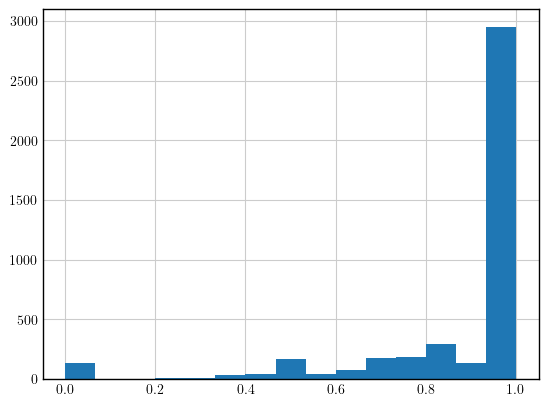

In [37]:
results.f1_scores.hist(bins=15)

<Axes: >

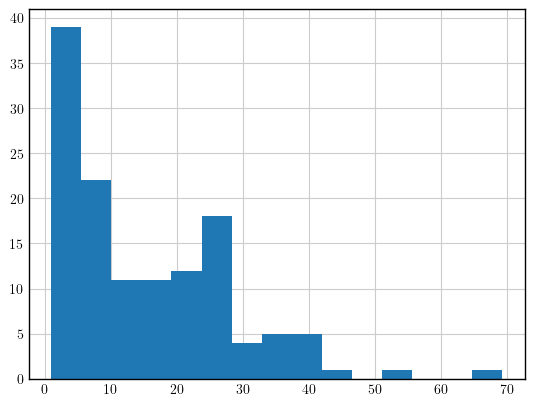

In [38]:
worst_finishes.med_scores.hist(bins=15)

In [39]:
# sparse-bar formation of the same histogram data
ax = (
  worst_finishes
    .med_scores
    .sort_values()
    .map(lambda x: (x // 10) * 10)
    .map(lambda x: "[" + str(int(x)) + ", " + str(int(x+10)) + ")")
    .value_counts()
)
print(ax.to_latex())
print(ax.to_markdown())

\begin{tabular}{lr}
\toprule
{} &  med\_scores \\
\midrule
[0, 10)  &          59 \\
[20, 30) &          32 \\
[10, 20) &          25 \\
[30, 40) &          11 \\
[40, 50) &           1 \\
[50, 60) &           1 \\
[60, 70) &           1 \\
\bottomrule
\end{tabular}

|          |   med_scores |
|:---------|-------------:|
| [0, 10)  |           59 |
| [20, 30) |           32 |
| [10, 20) |           25 |
| [30, 40) |           11 |
| [40, 50) |            1 |
| [50, 60) |            1 |
| [60, 70) |            1 |


<ipython-input-39-ff779c7471e7>:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(ax.to_latex())


<Axes: >

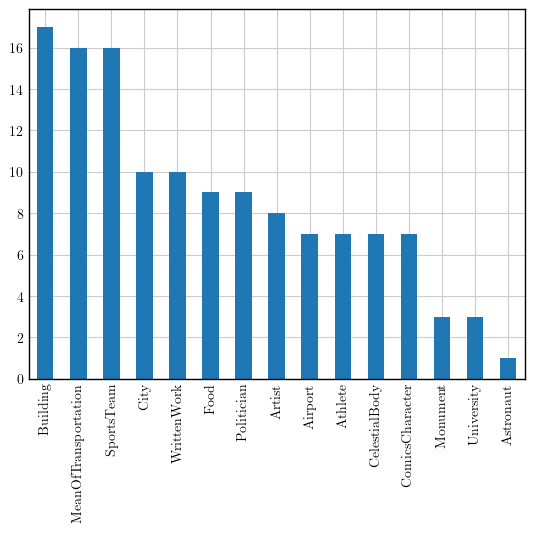

In [40]:
worst_finishes.category.value_counts().plot.bar()

<Axes: >

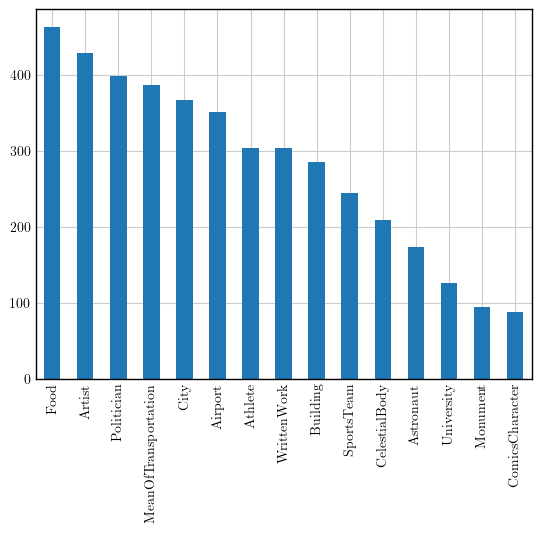

In [41]:
train_corpus = test_predictions
train_corpus.category.value_counts().plot.bar()

<Axes: >

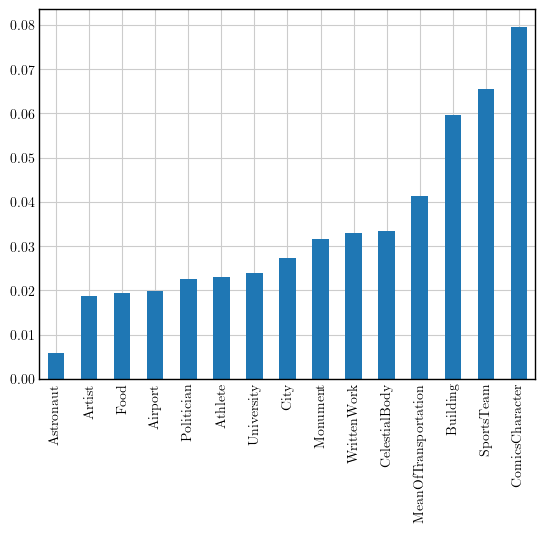

In [42]:
# normalized performance by category
npc = worst_finishes.category.value_counts() / train_corpus.category.value_counts()
npc.sort_values().plot.bar()

 the network performs poorly on buildings, sports teams, and monuments when
 normalized for class prevalence. Poor performance on monument may be explained
 by its under-representation in the training set. This does not hold for sports
 teams and monuments, which have good representation in the training set but do
 not have good performance. This points to qualitative features particular to
 entries in those categories.

In [43]:
worst_finishes.sort_values(by=['med_scores'])

,record_idx,seed_number,subset,category,split_index,sd,nl,task,input_ids,attention_mask,labels,pred_ids,decoded,f1_scores,med_scores,nth_finish
77962,14619,1,test,Building,124,"s2d 1: Adare Manor|architect|James Pain and George Richard Pain,",James Pain and George Richard Pain are the architects of the Adare Manor.,s2d,"[2549, 19043, 11, 3080, 4117, 19043, 33, 8, 19186, 13, 8, 1980, 355, 1140, 127, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]","[3, 7, 357, 26, 209, 10, 1980, 355, 1140, 127, 9175, 7064, 23, 5822, 17, 9175, 683, 9, 2687, 19043, 11, 3080, 4117, 19043, 6, 1]","[0, 3, 7, 357, 26, 3, 632, 10, 1980, 355, 1140, 127, 9175, 7064, 23, 5822, 17, 9175, 683, 9, 2687, 19043, 11, 3080, 4117, 19043, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, ...]",s2d 0: Adare Manor|architect|James Pain and George Richard Pain,0.0,1.000000,4094
78156,14663,0,test,City,168,"s2d 0: Albany, Georgia|area code|229","The area code for Albany, Georgia is 229.",s2d,"[37, 616, 1081, 21, 27119, 6, 5664, 19, 1630, 8797, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]","[3, 7, 357, 26, 3, 632, 10, 27119, 6, 5664, 9175, 498, 1081, 9175, 357, 3166, 1]","[0, 3, 7, 357, 26, 3, 632, 10, 27119, 6, 5664, 9175, 498, 1081, 9175, 2884, 8797, 1, 0, 0, 0, 0, 0, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, ...]","s2d 0: Albany, Georgia|area code|229.",0.0,1.000000,4094
78242,14680,0,test,City,185,"s2d 0: Auburn, Washington|area total|77.41 (square kilometres)",Auburn (Washington) has a total area of 77.4 square kilometres.,s2d,"[28384, 41, 518, 3198, 6029, 61, 65, 3, 9, 792, 616, 13, 3, 4013, 5, 591, 2812, 3, 20656, 7, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]